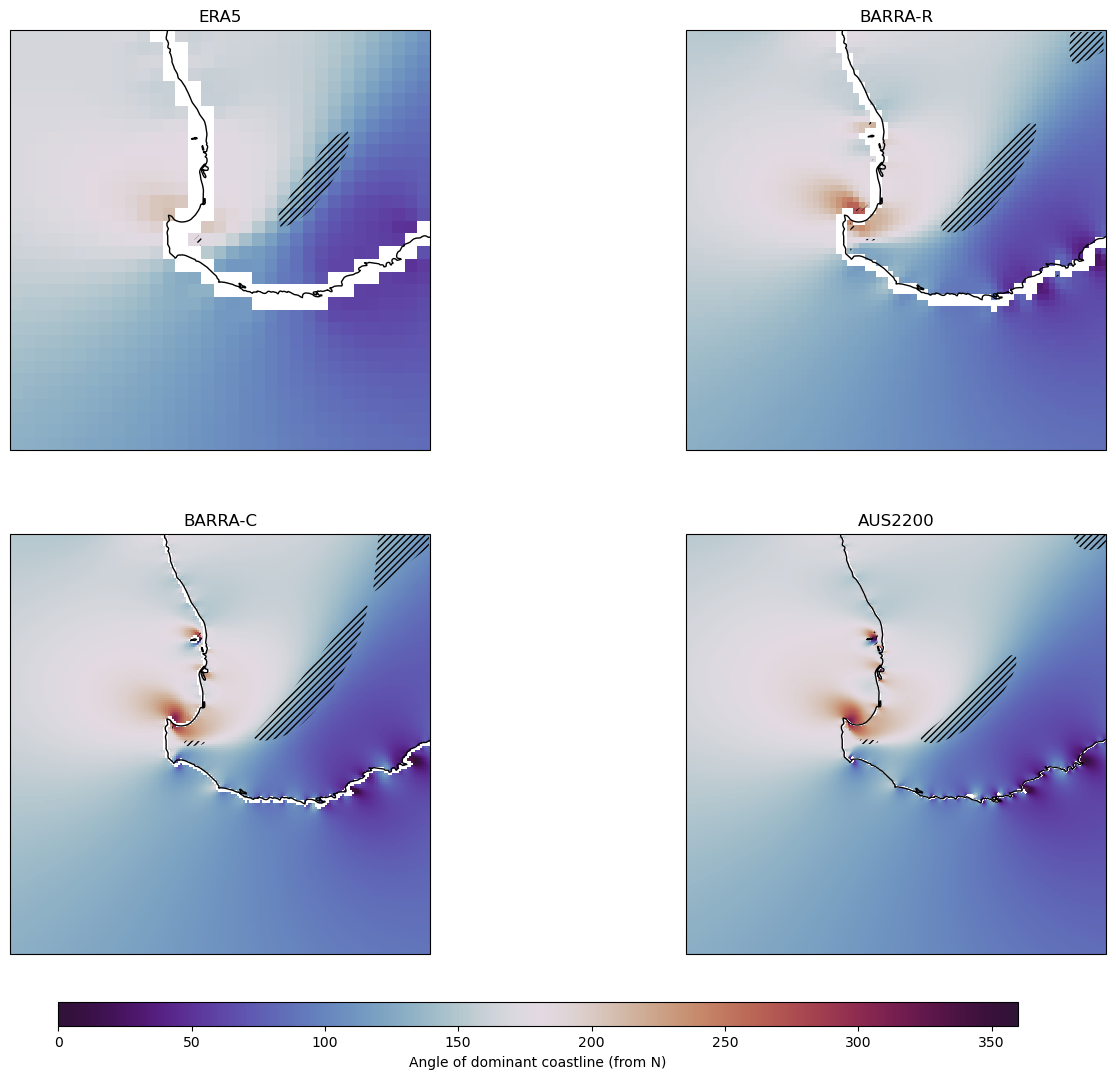

In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

#lat_slice=slice(-15,-8)
#lon_slice=slice(125,135)
lat_slice=slice(-38,-30)
lon_slice=slice(112,120)

f1 = xr.open_dataset("/g/data/gb02/ab4502/coastline_data/era5.nc").sel(lat=lat_slice,lon=lon_slice)
f2 = xr.open_dataset("/g/data/gb02/ab4502/coastline_data/barra_r.nc").sel(lat=lat_slice,lon=lon_slice)
f3 = xr.open_dataset("/g/data/gb02/ab4502/coastline_data/barra_c.nc").sel(lat=lat_slice,lon=lon_slice)
f4 = xr.open_dataset("/g/data/gb02/ab4502/coastline_data/aus2200.nc").sel(lat=lat_slice,lon=lon_slice)

plt.figure(figsize=[16,12])
ax = plt.subplot(2,2,1,projection=ccrs.PlateCarree())
f1.angle.plot(cmap="twilight_shifted",vmin=0,vmax=360,add_colorbar=False)
xr.plot.contourf(f1.variance,levels=[0.,0.5],hatches=["","/////"],colors="none",add_colorbar=False)
ax.coastlines()
plt.title("ERA5")

ax = plt.subplot(2,2,2,projection=ccrs.PlateCarree())
f2.angle.plot(cmap="twilight_shifted",vmin=0,vmax=360,add_colorbar=False)
xr.plot.contourf(f2.variance,levels=[0.,0.5],hatches=["","/////"],colors="none",add_colorbar=False)
ax.coastlines()
plt.title("BARRA-R")

ax = plt.subplot(2,2,3,projection=ccrs.PlateCarree())
f3.angle.plot(cmap="twilight_shifted",vmin=0,vmax=360,add_colorbar=False)
xr.plot.contourf(f3.variance,levels=[0.,0.5],hatches=["","/////"],colors="none",add_colorbar=False)
ax.coastlines()
plt.title("BARRA-C")

ax = plt.subplot(2,2,4,projection=ccrs.PlateCarree())
c=f4.angle.plot(cmap="twilight_shifted",vmin=0,vmax=360,add_colorbar=False)
xr.plot.contourf(f4.variance,levels=[0.,0.5],hatches=["","/////"],colors="none",add_colorbar=False)
ax.coastlines()
plt.title("AUS2200")

cax=plt.axes([0.2,0.05,0.6,0.02])
cb=plt.colorbar(c,cax=cax,orientation="horizontal")
cb.set_label("Angle of dominant coastline (from N)")